In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#https://www.w3schools.com/python/pandas/ref_df_describe.asp
#histograms & box plots @ https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/
#adding legend https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#import seaborn as sns
#import sys
#from datetime import datetime
#import csv
import pandas as pd
import plotly.express as px





# Read in C02 file and examine dataset

In [69]:
# Read the Excel file into a pandas DataFrame and exclude inital 14 rows
df = pd.read_excel('Book1.xlsx',skiprows=range(14))

In [70]:
df.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


In [71]:
df.dtypes

Gasage (yr BP)           float64
CO2 (ppmv)               float64
sigma mean CO2 (ppmv)    float64
dtype: object

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB


Remove blank spaces at beginning and end of string https://stackoverflow.com/questions/41476150/remove-or-replace-spaces-in-column-names

In [73]:
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

In [74]:
plot1 = df[['Gasage (yr BP)', 'CO2 (ppmv)']]

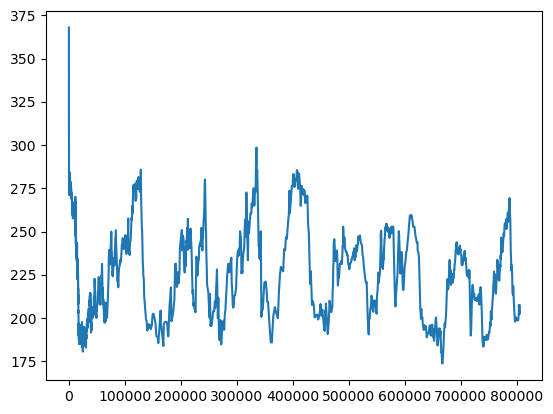

In [75]:
plt.plot(plot1['Gasage (yr BP)'],plot1['CO2 (ppmv)'])
plt.show()

# Reading in Deuterium data

In [76]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

#https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
df1=pd.read_csv('Antartica.txt',delimiter=r"\s+")
#df1 = pd.read_csv("deter.csv",sep = " ")
#df1.describe()
#print(df1['Bag'])
df1

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [77]:
df1.describe

<bound method NDFrame.describe of        Bag     ztop           Age  Deuterium  Temperature
0        1     0.00     -50.00000        NaN          NaN
1        2     0.55     -43.54769        NaN          NaN
2        3     1.10     -37.41829        NaN          NaN
3        4     1.65     -31.61153        NaN          NaN
4        5     2.20     -24.51395        NaN          NaN
...    ...      ...           ...        ...          ...
5795  5796  3187.25  797408.00000    -440.20        -8.73
5796  5797  3187.80  798443.00000    -439.00        -8.54
5797  5798  3188.35  799501.00000    -441.10        -8.88
5798  5799  3188.90  800589.00000    -441.42        -8.92
5799  5800  3189.45  801662.00000    -440.90        -8.82

[5800 rows x 5 columns]>

In [78]:
df1.dtypes

Bag              int64
ztop           float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bag          5800 non-null   int64  
 1   ztop         5800 non-null   float64
 2   Age          5800 non-null   float64
 3   Deuterium    5788 non-null   float64
 4   Temperature  5785 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 226.7 KB


In [80]:
df1.columns = df1.columns.str.lstrip()
df1.columns = df1.columns.str.rstrip()

In [81]:
plot2 = df1[['Age', 'Deuterium']]

In [82]:
plot3 = df1[['Age', 'Temperature']]

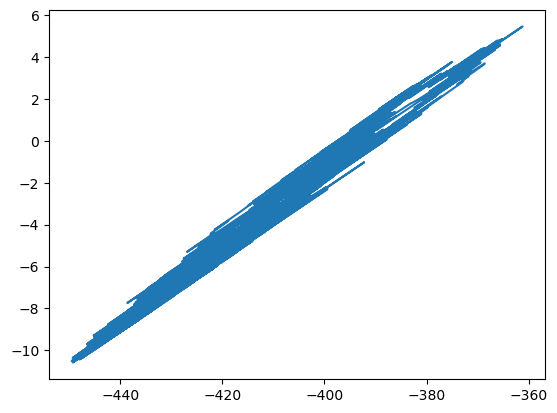

In [83]:
plt.plot(df1['Deuterium'],df1['Temperature'])

In [87]:
fig = px.line(df1, x='Age', y='Deuterium')
fig.show()

In [89]:
fig = px.line(df1, x='Age', y='Temperature')
fig.show()

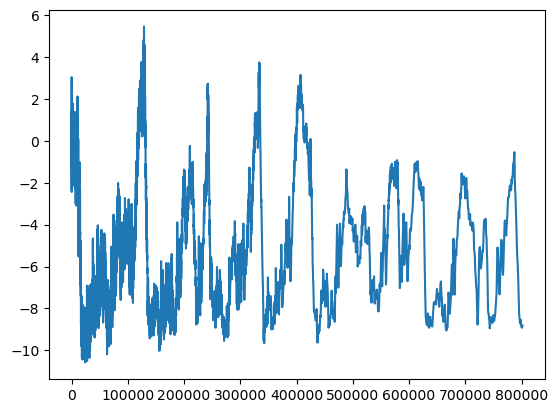

In [90]:
#plt.plot(plot1['Age'],plot1['Deuterium'])
plt.plot(plot3['Age'],plot3['Temperature'])
plt.show()